# ATMS 391
## Homework 8: Linear regression
---
### Problem 1

Perform a linear regression between hourly temperature `(DryBulbCelsius)` and dewpoint `(DewPointCelsius)` at Chicago for the month of August 2015.  Ignore missing data.

(a) Make a scatter plot of the data, and the linear regression fit.  Include a legend.

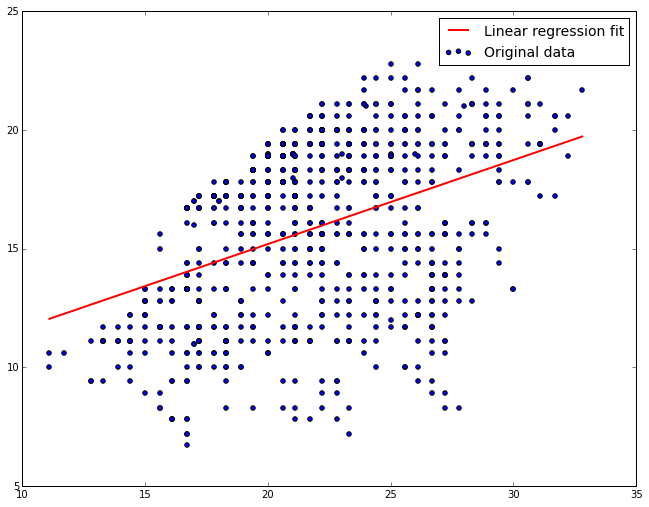

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

data = pd.read_csv('chicago_hourly_aug_2015.csv', header=6)
lm = smf.ols(formula='DewPointCelsius ~ DryBulbCelsius', data=data).fit()
X_new = pd.DataFrame({'DryBulbCelsius': [data['DryBulbCelsius'].min(), data['DryBulbCelsius'].max()]})
#X_new
preds = lm.predict(X_new)
#preds

plt.figure(figsize=(11,8.5))
plt.scatter(data['DryBulbCelsius'], data['DewPointCelsius'], label='Original data')
plt.plot(X_new, preds, c='red', linewidth=2, label='Linear regression fit')
plt.legend(fontsize=14, loc='best')

(b) What are the fit coefficients?

In [3]:
lm.params

Intercept         8.109144
DryBulbCelsius    0.354261
dtype: float64

(c) What is the 95% confidence interval of the fit?

In [4]:
lm.conf_int()

0         1
Intercept       6.911831  9.306457
DryBulbCelsius  0.300409  0.408113

(d) Can we reject the null hypothesis that there is no relation between temperature and dewpoint?  At what confidence level?

In [5]:
lm.pvalues
#Yes. 95% confidence level

Intercept         7.838280e-37
DryBulbCelsius    5.205614e-35
dtype: float64

(e) What is the value of $R^2$ for this fit?

In [6]:
lm.rsquared

0.16127092512266117

(f) Include Mean Sea Level Pressure `(SeaLevelPressure)` and Wind Speed `(Wind Speed)` in a multiple linear regression model.  Calculate p-values for each variable to see if it works?  Are these new variables directly or inversely related with temperature?  With the additional data, does the multiple linear regression improve the fit, compared with the linear model above?  Give $R^2$ value of the fit.

In [7]:
data['SeaLevelPressure'] = data['SeaLevelPressure'][data['SeaLevelPressure']!='M']
data['SeaLevelPressure'] = [float(item) for item in data['SeaLevelPressure']]
data['DryBulbCelsius']


lm = smf.ols(formula='DewPointCelsius ~ DryBulbCelsius + SeaLevelPressure + WindSpeed', data=data).fit()
lm.pvalues
#lm.summary()

Intercept           2.945479e-22
DryBulbCelsius      1.084503e-66
SeaLevelPressure    2.908136e-21
WindSpeed           8.349756e-60
dtype: float64